**Designing Spam filtering system Using Machine Learning algorithem**

***Importing requried module***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
# Converting text into list of sentence
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords 
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Reading data
data = pd.read_csv("/content/drive/MyDrive/spam.csv",encoding= 'ISO-8859-1' )
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
# Detail of column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#checking total number of null
data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
# Removing unwanted column from data
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis='columns',inplace = True)

In [ ]:
# Renaming the v1 and v2 column as target and text
data.rename(columns = {"v1":"Target","v2":"Text"},inplace = True )
data.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


**Removing Duplicate text**

In [ ]:
#Counting duplicate row in text column

print("No of duplicate values",data.duplicated().sum())

No of duplicate values 403


In [ ]:
data = data.drop_duplicates(keep = "first")
print("No of duplicate values",data.duplicated().sum())

No of duplicate values 0


In [ ]:
# Number of row and columns
data.shape

(5169, 2)

**Visualisation**

([<matplotlib.patches.Wedge at 0x7f4c40786550>,
 [Text(-1.1989542206198907, 0.5025025142800291, 'harm'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.7378179819199326, 0.30923231648001787, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

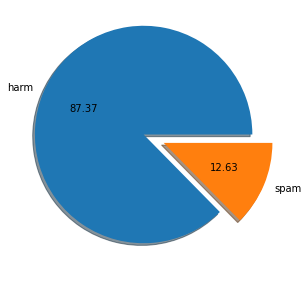

In [ ]:
# Pie plot of complete data
plt.figure(figsize = (5,5))
myexplode = [0.2, 0]
plt.pie(data["Target"].value_counts(),labels = ["harm","spam"],autopct= "%.2f",explode = myexplode, shadow= True)

**Label Encoding**

In [ ]:
# Encode Target column by label encoding
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data["Target"] = encode.fit_transform(data["Target"])
data.head(20)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


**Feature Engneering**

In [ ]:
# Adding three column num_character, num_word, num_sentence
data["num_charaters"] = data["Text"].apply(len)

In [ ]:
data["num_words"]=data["Text"].apply(lambda word : len(nltk.word_tokenize(word)))

In [ ]:
data["num_sentences"] = data["Text"].apply(lambda sentence : len(nltk.sent_tokenize(sentence)))

In [ ]:
data.head()

,Target,Text,num_charaters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
 data[["num_charaters","num_words","num_sentences"]].describe()

,num_charaters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


We can see "num_words" and "num_characters" columns has high correlation so we will take only one value


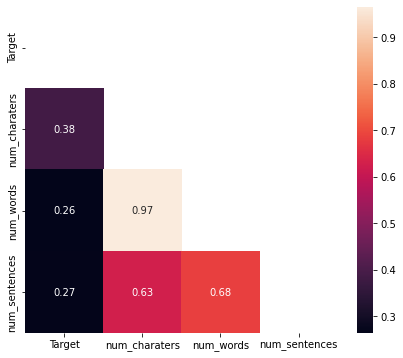

In [ ]:
#check correlation between column
# Generate a mask for the upper triangle
plt.figure(figsize = (7,6))

# It will mask upper triangle
mask = np.triu(np.ones_like(data[["Target","num_charaters","num_words","num_sentences"]].corr(), dtype=bool))

sns.heatmap(data[["Target","num_charaters","num_words","num_sentences"]].corr(), annot = True,mask = mask)

print("We can see \"num_words\" and \"num_characters\" columns has high correlation so we will take only one value")

**Data Preprocessing**

Lower Case

Tokenization

Removing Special Character

Steamming 

In [ ]:
# Working with complete text like removing punctuation, stopword, 
from nltk.stem.porter import PorterStemmer
PS = PorterStemmer()

def transform_text(text):
  # Convert complet text into text
  text = text.lower()

  text = nltk.word_tokenize(text)

  mylist = []

  for i in text: 
    if i.isalnum():
      mylist.append(i)
    
  text = mylist[:]
  print(text)
  mylist.clear()
  
  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
        mylist.append(i)
  
  mylist.clear()

  for i in text:
    mylist.append(PS.stem(i))
  
  return " ".join(mylist) 

text = "hello kiran324, ...how are you?" 
transform_text(text)

['hello', 'kiran324', 'how', 'are', 'you']
['hello', 'kiran324', 'how', 'are', 'you']


'hello kiran324 how are you'

In [ ]:
data["Transfrome_text"] = data["Text"].apply(transform_text)


Streaming output truncated to the last 5000 lines.
['thk', 'sure', 'got', 'time', 'to', 'hop', 'ard', 'ya', 'can', 'go', '4', 'free', 'abt', 'muz', 'call', 'u', 'to', 'discuss', 'liao']
['what', 'time', 'you', 'coming', 'down', 'later']
['bloody', 'hell', 'cant', 'believe', 'you', 'forgot', 'my', 'surname', 'mr', 'ill', 'give', 'u', 'a', 'clue', 'its', 'spanish', 'and', 'begins', 'with', 'm']
['well', 'i', 'gon', 'na', 'finish', 'my', 'bath', 'now', 'have', 'a', 'good', 'fine', 'night']
['let', 'me', 'know', 'when', 'you', 'got', 'the', 'money', 'so', 'carlos', 'can', 'make', 'the', 'call']
['u', 'still', 'going', 'to', 'the', 'mall']
['turns', 'out', 'my', 'friends', 'are', 'staying', 'for', 'the', 'whole', 'show', 'and', 'wo', 'be', 'back', 'til', 'lt', 'gt', 'so', 'feel', 'free', 'to', 'go', 'ahead', 'and', 'smoke', 'that', 'lt', 'gt', 'worth']
['text', 'her', 'if', 'she', 'doesnt', 'reply', 'let', 'me', 'know', 'so', 'i', 'can', 'have', 'her', 'log', 'in']
['hi', 'you', 'just', 'sp

In [ ]:
data.head(10)

,Target,Text,num_charaters,num_words,num_sentences,Transfrome_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go until jurong point avail onli in bugi n gre...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey there darl it been 3 week now and ...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even my brother is not like to speak with me t...
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,30,2,as per your request mell oru minnaminungint nu...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner as a valu network custom you have been ...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,had your mobil 11 month or more u r entitl to ...


**Visualing Word Cloud**

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. It is mainly used for analysing the data on social network.

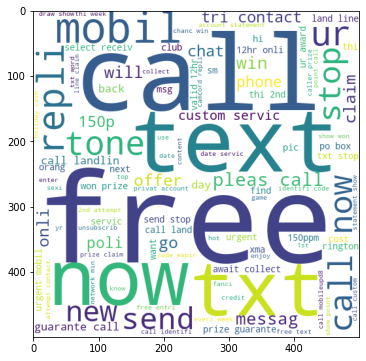

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = "white")
spam_wc = wc.generate(data[data['Target'] == 1]['Transfrome_text'].str.cat(sep=" ")) 
plt.figure(figsize = (6,6))
plt.imshow(spam_wc)

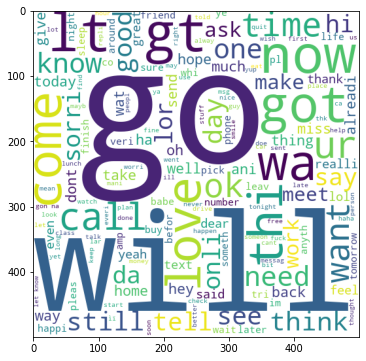

In [ ]:
harm_wc = wc.generate(data[data["Target"]== 0]["Transfrome_text"].str.cat(sep = " "))
plt.figure(figsize = (6,6))
plt.imshow(harm_wc)

**Checking top 30 words in ham and spam massege**

In [ ]:
spam_corpus = []
for msg in data[data["Target"] == 1]["Transfrome_text"].tolist():
  for word in msg.split():
    spam_corpus.append(word)
len(spam_corpus)

14414

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


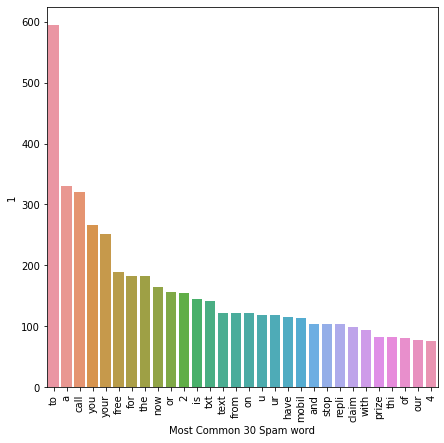

In [ ]:
from collections import Counter
plt.figure(figsize = (7,7))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xlabel("Most Common 30 Spam word")
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


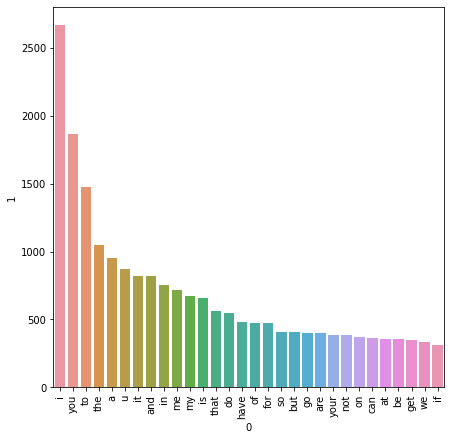

In [ ]:
# Most common 30 ham word in message 
ham_corpus = []
for msg in data[data["Target"]== 0]["Transfrome_text"].tolist():
  for i in msg.split():
    ham_corpus.append(i)
plt.figure(figsize= (7,7))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = "vertical")
plt.show()

**Model Building**


In [ ]:
# Vectorization is used for coverting text to a matrix of TF-IDF features
#TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. 
from sklearn.feature_extraction.text import TfidfVectorizer
Vectorizer  = TfidfVectorizer(max_features= 3000)

In [ ]:
X = Vectorizer.fit_transform(data["Transfrome_text"]).toarray()
X[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
Y = data["Target"].values
Y.shape

(5169,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2,random_state= 42 )
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Model Selection**

In [ ]:
# We are try three different naive bayes algorithem
# GaussianNB is used when feature are normaily distributed.
# MultinormalNB is used distrite distribusion of data. It count how often word occurs in the document.
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, precision_score
GNB = GaussianNB()
MNB = MultinomialNB()
BNM = BernoulliNB()

In [ ]:
GNB.fit(X_train,Y_train)
MNB.fit(X_train,Y_train)
BNM.fit(X_train,Y_train)

BernoulliNB()

In [ ]:
y_pred = GNB.predict(X_train)
y_pred1 = MNB.predict(X_train)
y_pred2 = BNM.predict(X_train)

In [ ]:
output = pd.DataFrame({"Model":["GaussianNB","MultinomialNB","BernoulliNB"],
             "Accuracy":[accuracy_score(Y_train,y_pred),accuracy_score(Y_train,y_pred1),accuracy_score(Y_train,y_pred2)],
             "Precision":[precision_score(Y_train,y_pred),precision_score(Y_train,y_pred1),precision_score(Y_train,y_pred2)]})

In [ ]:
output

,Model,Accuracy,Precision
0,GaussianNB,0.896977,0.543897
1,MultinomialNB,0.972914,1.000000
2,BernoulliNB,0.986215,0.989154


In [ ]:
#Let consider all Supervious Learning Algorithem for over dataset to check percision and accuracy value.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:

lg = LogisticRegression()
lg.fit(X_train,Y_train)

svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train,Y_train)

mnb = MultinomialNB()
mnb.fit(X_train,Y_train)

dtc = DecisionTreeClassifier(max_depth= 5)
dtc.fit(X_train,Y_train)

knn = KNeighborsClassifier() # It will take 5 nearest neighbors  with minkowski with p(Power paremeter) = 2 which is equivalent to eulident distance
knn.fit(X_train,Y_train)

rdf = RandomForestClassifier()#
rdf.fit(X_train,Y_train)

bgg = BaggingClassifier()
bgg.fit(X_train,Y_train)

ada = AdaBoostClassifier()
ada.fit(X_train,Y_train)

gbc = GradientBoostingClassifier()
gbc.fit(X_train,Y_train)

xgb = XGBClassifier()
xgb.fit(X_train,Y_train)


XGBClassifier()

In [ ]:
model = [lg,svc,mnb,dtc,knn,rdf,bgg,ada,gbc,xgb]
Model_name = ["LogisticRegression","SVC","MultinomialNB","DecisionTreeClassifier","KNeighborsClassifier","RandomForestClassifier","BaggingClassifier","AdaBoostClassifier","GradientBoostingClassifier","XGBClassifier"]
Accuracy = []
Precision = []
for i in model:
  y_pred = i.predict(X_train)
  Accuracy.append(accuracy_score(Y_train,y_pred))
  Precision.append(precision_score(Y_train,y_pred))


In [ ]:
Output_Preformance = pd.DataFrame({"Model" : Model_name,
                                         "Accuracy":Accuracy,
                                         "Precision":Precision})

Output_Preformance.sort_values("Precision", ascending= False)

,Model,Accuracy,Precision
2,MultinomialNB,0.972914,1.000000
5,RandomForestClassifier,0.999516,1.000000
0,LogisticRegression,0.973640,0.997506
4,KNeighborsClassifier,0.934704,0.995833
8,GradientBoostingClassifier,0.981620,0.995413
6,BaggingClassifier,0.997098,0.994024
9,XGBClassifier,0.975574,0.992736
1,SVC,0.987666,0.989293
7,AdaBoostClassifier,0.976784,0.959821
3,DecisionTreeClassifier,0.956469,0.907960


**Check if model is overfitted or not, we will go with MultinomialNB RandomForestClassifier Algorithm as Precision and Accuracy both good for it.**

Final Model

In [ ]:
model = RandomForestClassifier()#
model.fit(X_train,Y_train)
Y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("Training data accuracy is:",accuracy_score(Y_train,y_train_pred))
print("Test dataset accuracy is:",accuracy_score(Y_test_pred,Y_test))
print("From train test accuracy we can understand that model is not overfitted")

Training data accuracy is: 0.9995163240628778
Test dataset accuracy is: 0.9738878143133463
From train test accuracy we can understand that model is not overfitted


**Model Deployment**

In [ ]:
import pickle
filename1 = "trained_model.sav"
filename2 = "Vectorizer.sav"

pickle.dump(model , open(filename1 ,"wb"))

pickle.dump(Vectorizer , open(filename2 ,"wb"))

#Loading the saved model
loaded_model = pickle.load(open("trained_model.sav","rb"))
Vectorizer = pickle.load(open("Vectorizer.sav", "rb"))